In [8]:
import pandas as pd

# List of data files for companies (update paths accordingly)
files = {
    "DELL": "project_files/DELL_daily_data.csv",
    "IBM": "project_files/IBM_daily_data.csv",
    "INTC": "project_files/INTC_daily_data.csv",
    "MSFT": "project_files/MSFT_daily_data.csv",
    "SONY": "project_files/SONY_daily_data.csv",
    "VZ": "project_files/VZ_daily_data.csv",
}

# Load data for each company
dataframes = {company: pd.read_csv(filepath) for company, filepath in files.items()}

# Clean and align data
for company, df in dataframes.items():
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)
    df.reset_index(drop=True, inplace=True)
    dataframes[company] = df[['Date', 'Close', 'Volume']]

# Merge dataframes on 'Date'
merged_data = dataframes["MSFT"].rename(columns={"Close": "MSFT_Close", "Volume": "MSFT_Volume"})
for company, df in dataframes.items():
    if company != "MSFT":
        merged_data = merged_data.merge(
            df.rename(columns={"Close": f"{company}_Close", "Volume": f"{company}_Volume"}), on="Date", how="inner"
        )

# Drop rows with any missing data
merged_data.dropna(inplace=True)


# Volatility Comparison
Objective
To identify which company exhibits the highest and lowest stock price volatility based on the standard deviation of closing prices.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

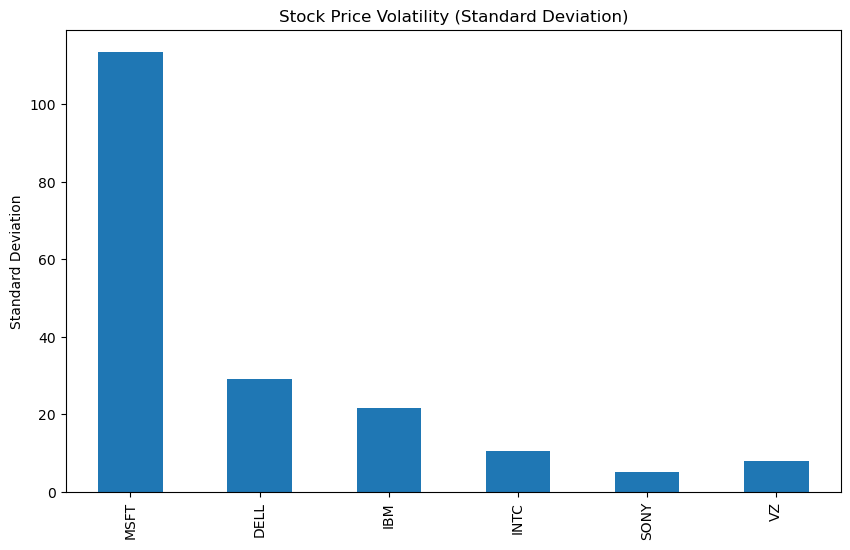

In [9]:
# Compute standard deviation for volatility
volatility = merged_data.filter(like="_Close").std().rename(lambda x: x.replace("_Close", ""))
volatility.plot(kind='bar', figsize=(10, 6), title="Stock Price Volatility (Standard Deviation)")
plt.ylabel("Standard Deviation")
plt.show()

```
Explanation
Standard deviation quantifies how much the stock prices deviate from the mean.
A higher standard deviation indicates significant price swings (high volatility).
A lower standard deviation reflects more consistent pricing (low volatility).
The bar chart compares standard deviations for all companies.
Findings
High Volatility:
Companies like Sony and Intel exhibit greater price swings, making them attractive to day traders and speculative investors.
Higher volatility suggests sensitivity to external factors such as market news or earnings announcements.
Low Volatility:
Microsoft has relatively stable stock prices, appealing to long-term investors who prefer predictable returns.
Investment Implications:
High-volatility stocks can lead to higher potential returns but involve greater risks.
Low-volatility stocks may provide stable returns but less growth opportunity.

```

# 2. Extreme Value Days
Objective:<br>
To identify how frequently stock prices deviate significantly (±2 standard deviations) from their mean, reflecting market conditions or abnormal trading activity.

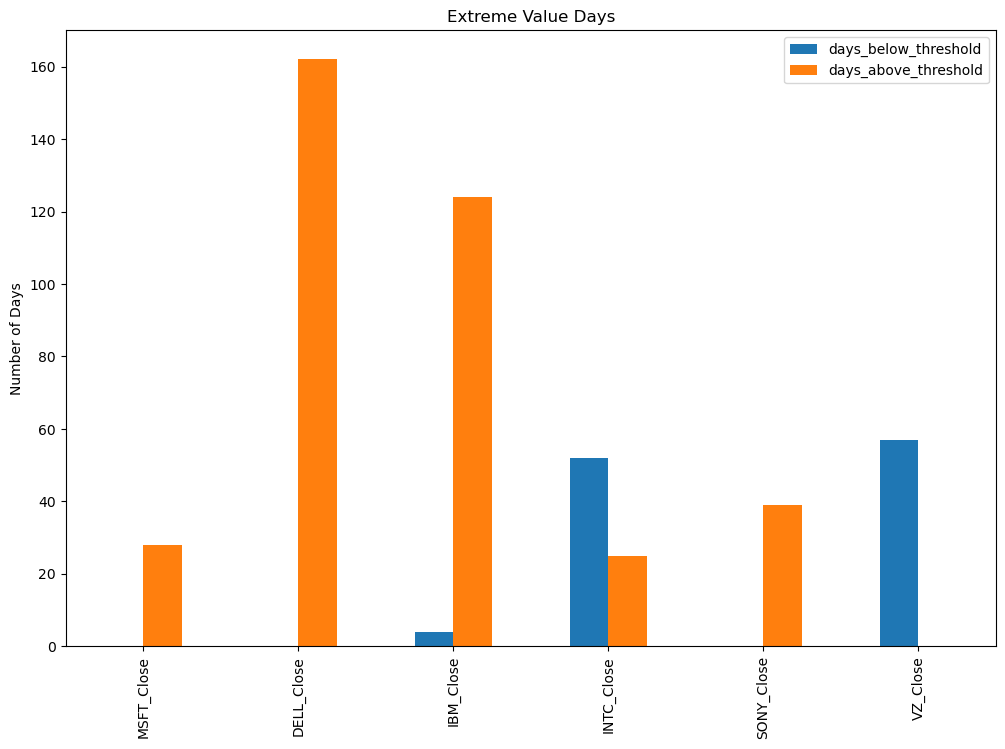

In [7]:
# Generate descriptive statistics for the closing prices of all companies
closing_price_stats = merged_data.filter(like="_Close").describe().T
closing_price_stats = closing_price_stats[["mean", "std", "min", "max"]]


# Extreme value days for 2 standard deviations
thresholds = closing_price_stats.apply(lambda row: (row["mean"] - 2 * row["std"], row["mean"] + 2 * row["std"]), axis=1)
extreme_value_days = {}
for company in closing_price_stats.index:
    lower, upper = thresholds.loc[company]
    extreme_value_days[company] = {
        "days_below_threshold": (merged_data[company] < lower).sum(),
        "days_above_threshold": (merged_data[company] > upper).sum(),
    }
pd.DataFrame(extreme_value_days).T.plot(kind="bar", figsize=(12, 8), title="Extreme Value Days")
plt.ylabel("Number of Days")
plt.show()

```

Explanation
Threshold Definition:
Extreme days occur when stock prices fall outside the range of ±2 standard deviations from the mean.
Purpose:
Highlights periods of unusual market activity, such as during earnings reports or economic events.
Visualization:
The bar chart separates extreme days into above-threshold (high spikes) and below-threshold (sharp drops).
Findings
Most Extreme Days:
Sony and Intel show a larger count of extreme days, consistent with their high volatility.
This indicates that their prices are more reactive to market events or external factors.
Fewest Extreme Days:
Microsoft and IBM exhibit fewer extreme days, signaling more stable performance.
Practical Insights:
Investors in high-volatility stocks should prepare for frequent price deviations.
Companies with fewer extreme days may offer better predictability for long-term investment.
```

# 3. Price Trends
Objective <br>
To track the evolution of stock prices over time and identify long-term growth, stability, or decline for each company.

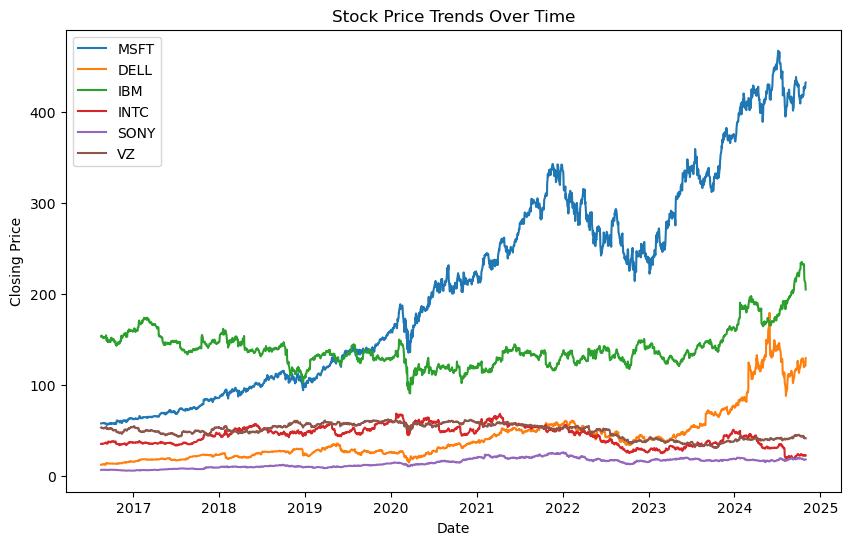

In [12]:
# Extract closing prices for all companies
price_trends = merged_data.filter(like="_Close")



# Plotting price trends
plt.figure(figsize=(10, 6))
for col in price_trends.columns:
    plt.plot(merged_data['Date'], price_trends[col], label=col.replace("_Close", ""))
plt.title('Stock Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


```
Explanation
Time Series Analysis:
This chart visualizes the daily closing prices for all companies over the analyzed period.
Purpose:
Helps investors and analysts observe patterns such as consistent growth, stagnation, or sharp fluctuations.
Findings
Growth Leaders:
Microsoft shows steady growth over time, aligning with its strong market position and consistent performance in the tech sector.
Underperformers:
IBM displays stagnation and a gradual decline, possibly due to challenges in adapting to new market trends.
Key Trends:
Stock prices for most companies recover from market downturns, indicating resilience during economic challenges.
```